In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb
from mplsoccer import VerticalPitch, Pitch


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [106]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
df_competitions = sb.competitions()
df_competitions[df_competitions['competition_name'] == 'UEFA Euro']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
40,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979


In [4]:
df_matches = sb.matches(competition_id=55, season_id=43)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [5]:
matches_list = df_matches.match_id.unique()

In [6]:
df_events = sb.competition_events(
            country="Europe",
            division="UEFA Euro",
            season="2020",
)

df_frames = sb.competition_frames(
    country="Europe",
    division= "UEFA Euro",
    season="2020"
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Pytho

In [7]:
df_events.shape, df_frames.shape

((192692, 112), (2538580, 7))

In [10]:
df_passes = df_events[df_events['type'] == 'Pass']

In [11]:
df_passes.shape

(54819, 112)

In [29]:
df_passes['location_x'] = df_passes['location'].apply(lambda x: x[0])
df_passes['location_y'] = df_passes['location'].apply(lambda x: x[1])
df_passes['pass_end_location_x'] = df_passes['pass_end_location'].apply(lambda x: x[0])
df_passes['pass_end_location_y'] = df_passes['pass_end_location'].apply(lambda x: x[1])

/var/folders/gf/v8lw1m9d0x9454xmvtfnbbqm0000gn/T/ipykernel_67897/66352294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes['location_x'] = df_passes['location'].apply(lambda x: x[0])
/var/folders/gf/v8lw1m9d0x9454xmvtfnbbqm0000gn/T/ipykernel_67897/66352294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes['location_y'] = df_passes['location'].apply(lambda x: x[1])
/var/folders/gf/v8lw1m9d0x9454xmvtfnbbqm0000gn/T/ipykernel_67897/66352294.py:3: SettingWithCopyWarning: 
A value is tryi

In [30]:
df_passes[['location_x', 'location_y', 'pass_end_location_x', 'pass_end_location_y']].describe()

,location_x,location_y,pass_end_location_x,pass_end_location_y
count,54819.000000,54819.000000,54819.000000,54819.000000
mean,58.635276,39.771574,64.038459,39.701335
std,27.390519,24.149634,27.391255,23.696865
min,0.100000,0.100000,0.100000,0.100000
25%,39.500000,18.600000,44.100000,18.900000
50%,58.200000,39.800000,64.000000,39.500000
75%,78.100000,61.000000,84.500000,60.500000
max,120.000000,80.000000,120.000000,80.000000


In [39]:
df_passes.pass_type.unique()

array(['Kick Off', nan, 'Recovery', 'Free Kick', 'Throw-in',
       'Interception', 'Corner', 'Goal Kick'], dtype=object)

In [100]:
df_passes_into_box = df_passes[(~df_passes['pass_type'].isin(['Free Kick', 'Throw-in', 'Corner', 'Goal Kick'])) 
                            #    & (df_passes['team'].isin(['England', 'Italy', 'Germany'])) 
                               & (df_passes['pass_end_location_x'] >= 90) 
                               & (df_passes['pass_end_location_y'] >= 18) 
                               & (df_passes['pass_end_location_y'] <= 62)
                               & ((df_passes['location_y'] <= 18) | (df_passes['location_y'] >= 62) | (df_passes['location_x'] <= 102))
                                  ]
df_passes_into_box.shape

(4304, 116)

In [101]:
df_passes_into_box_cutback = df_passes[(~df_passes['pass_type'].isin(['Free Kick', 'Throw-in', 'Corner', 'Goal Kick'])) 
                            #    & (df_passes['team'].isin(['England', 'Italy', 'Germany'])) 
                               & (df_passes['pass_end_location_x'] >= 90) 
                               & (df_passes['pass_end_location_y'] >= 18) 
                               & (df_passes['pass_end_location_y'] <= 62)
                               & (df_passes['location_x'] >= 102)
                               & ((df_passes['location_y'] <= 18) | (df_passes['location_y'] >= 62))
                               & (df_passes['location_x'] >= df_passes['pass_end_location_x'])
                               ]
df_passes_into_box_cutback.shape

(373, 116)

In [102]:
df_passes_into_box_cutback.shape[0] / df_passes_into_box.shape[0]

0.0866635687732342

In [117]:
df_passes_into_box_cutback['pass_shot_assist'].sum(), df_passes_into_box['pass_shot_assist'].sum(), df_passes['pass_shot_assist'].sum()

(56, 356, 833)

In [125]:
df_passes_shot_assist = df_passes_into_box_cutback[df_passes_into_box_cutback['pass_shot_assist'] == True]
df_passes_no_shot_assist = df_passes_into_box_cutback[df_passes_into_box_cutback['pass_shot_assist'] != True]

In [132]:
df_passes_cutbacks = df_passes[df_passes['pass_cut_back'] == True]

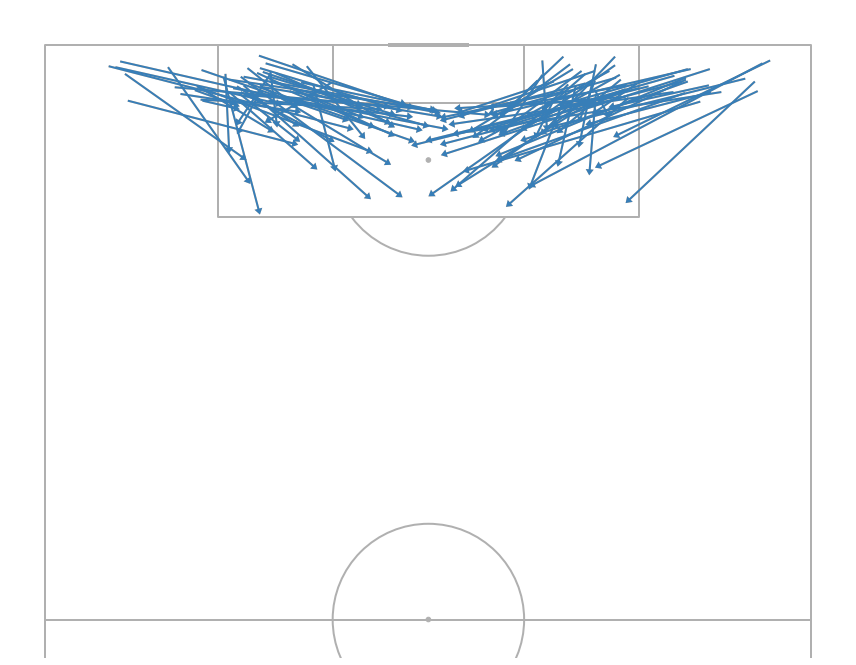

In [133]:
pitch = VerticalPitch(half=True, pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(12,10))

p1 = pitch.arrows(df_passes_cutbacks['location_x'], df_passes_cutbacks['location_y'],df_passes_cutbacks['pass_end_location_x'],df_passes_cutbacks['pass_end_location_y'], alpha=1, color=CB_color_cycle[0],
                 headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax, zorder=2)
p2 = pitch.arrows(df_passes_cutbacks['location_x'], df_passes_cutbacks['location_y'],df_passes_cutbacks['pass_end_location_x'],df_passes_cutbacks['pass_end_location_y'], alpha=0.4, color=CB_color_cycle[1],
                 headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax)


In [134]:
df_passes_into_box_cutback.head(10)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_lost_in_play,goalkeeper_outcome,goalkeeper_penalty_saved_to_post,goalkeeper_position,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,goalkeeper_shot_saved_to_post,goalkeeper_success_in_play,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,player_off_permanent,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,location_x,location_y,pass_end_location_x,pass_end_location_y
488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.839348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9f80b238-3ffb-451c-817d-7f02a2ddf987,481,NaN,NaN,"[108.8, 17.5]",3795108,10,NaN,NaN,NaN,NaN,1.608873,NaN,Left Foot,True,NaN,NaN,"[108.0, 38.5]",NaN,Ground Pass,NaN,21.015232,NaN,NaN,Incomplete,NaN,Jorge Resurrección Merodio,NaN,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Jordi Alba Ramos,5211.0,NaN,Left Back,10,Spain,772,"[a9345a6c-0fc4-4695-b8ec-8573c8d9472e, e5459c7...",11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:10:11.873,Pass,NaN,108.8,17.5,108.0,38.5
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.233426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9f2ed273-f8b6-4cc1-9e69-8c0fb6aa04ad,543,NaN,NaN,"[102.6, 13.2]",3795108,11,NaN,NaN,NaN,NaN,1.634203,NaN,Left Foot,NaN,NaN,NaN,"[101.4, 32.1]",NaN,Ground Pass,NaN,18.938057,NaN,NaN,NaN,NaN,Álvaro Borja Morata Martín,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,Pablo Sarabia García,6720.0,NaN,Left Wing,12,Spain,772,[7638b17c-01d9-4fd0-ab61-5e093a01c471],6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:11:06.734,Pass,NaN,102.6,13.2,101.4,32.1
787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.139244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9de7a3e4-512e-48c5-9ac6-4033c6b66ef2,1489,NaN,NaN,"[116.1, 66.9]",3795108,34,NaN,NaN,NaN,NaN,-1.690700,NaN,Left Foot,NaN,NaN,NaN,"[115.1, 58.6]",NaN,High Pass,NaN,8.360024,NaN,NaN,Incomplete,NaN,Haris Seferović,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,Xherdan Shaqiri,3533.0,NaN,Center Attacking Midfield,55,Switzerland,773,"[549299d0-47b1-48b4-bce1-9a02cc207fbb, a6a5aed...",26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,773,00:34:26.987,Pass,NaN,116.1,66.9,115.1,58.6
946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [135]:
df_passes['pass_cut_back'].sum()

107

In [137]:
df_passes_cutbacks['pass_shot_assist'].sum()

22

In [138]:
df_passes_cutbacks.team.value_counts()

Spain              10
Denmark             9
Ukraine             8
Wales               7
England             7
Netherlands         7
Germany             6
Belgium             5
Switzerland         5
Poland              5
Italy               4
Portugal            4
Turkey              4
France              4
Austria             3
Czech Republic      3
Finland             3
Russia              3
Croatia             3
Slovakia            2
Scotland            2
North Macedonia     1
Sweden              1
Hungary             1
Name: team, dtype: int64

In [136]:
df_passes_cutbacks.shape

(107, 116)